<a href="https://colab.research.google.com/github/swamyshravan/data-science-projects/blob/main/decision-tree/breast_cancer_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd

**Load data**

In [48]:
data = pd.read_csv('wisc_bc_data.csv')
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


**Seperate dependent and Independent Variables from the dataset**

In [49]:
X = data.iloc[:,2:]
y = data.iloc[:,1]
y.head(3)

0    M
1    M
2    M
Name: diagnosis, dtype: object

**Divide the dataset into training and testing dataset**

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [51]:
print('train data',len(X_train),'+ test data',len(X_test),'= total',len(data),)

train data 455 + test data 114 = total 569


**Fit decision tree to the training data**

In [52]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
model = dtree.fit(X,y)

**predict the test values using the model we created**

In [53]:
y_pred = model.predict(X_test)

**Using confusion matrix to visualise the accuracy of our prediction**

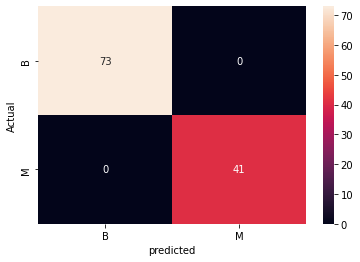

In [54]:
import seaborn as sn
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['predicted'])
sn.heatmap(confusion_matrix, annot=True)
#confusion_matrix

**Visualising the tree using sklean and graphviz**

[Text(209.25, 203.85, 'X[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [357, 212]'),
 Text(136.01250000000002, 176.67000000000002, 'X[27] <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [346, 33]'),
 Text(78.46875, 149.49, 'X[12] <= 6.597\ngini = 0.03\nsamples = 333\nvalue = [328, 5]'),
 Text(68.00625000000001, 122.31, 'X[13] <= 38.605\ngini = 0.024\nsamples = 332\nvalue = [328, 4]'),
 Text(41.85, 95.13, 'X[14] <= 0.003\ngini = 0.012\nsamples = 319\nvalue = [317, 2]'),
 Text(20.925, 67.94999999999999, 'X[21] <= 27.755\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(10.4625, 40.77000000000001, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(31.387500000000003, 40.77000000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(62.775000000000006, 67.94999999999999, 'X[21] <= 33.27\ngini = 0.006\nsamples = 312\nvalue = [311, 1]'),
 Text(52.3125, 40.77000000000001, 'gini = 0.0\nsamples = 292\nvalue = [292, 0]'),
 Text(73.2375, 40.77000000000001, 'X[21] <= 33.56\ngini = 0.095\n

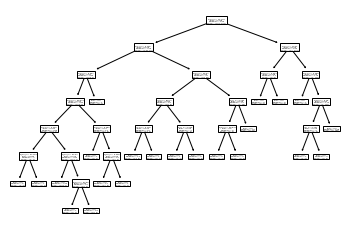

In [55]:
from sklearn import tree
tree.plot_tree(model)

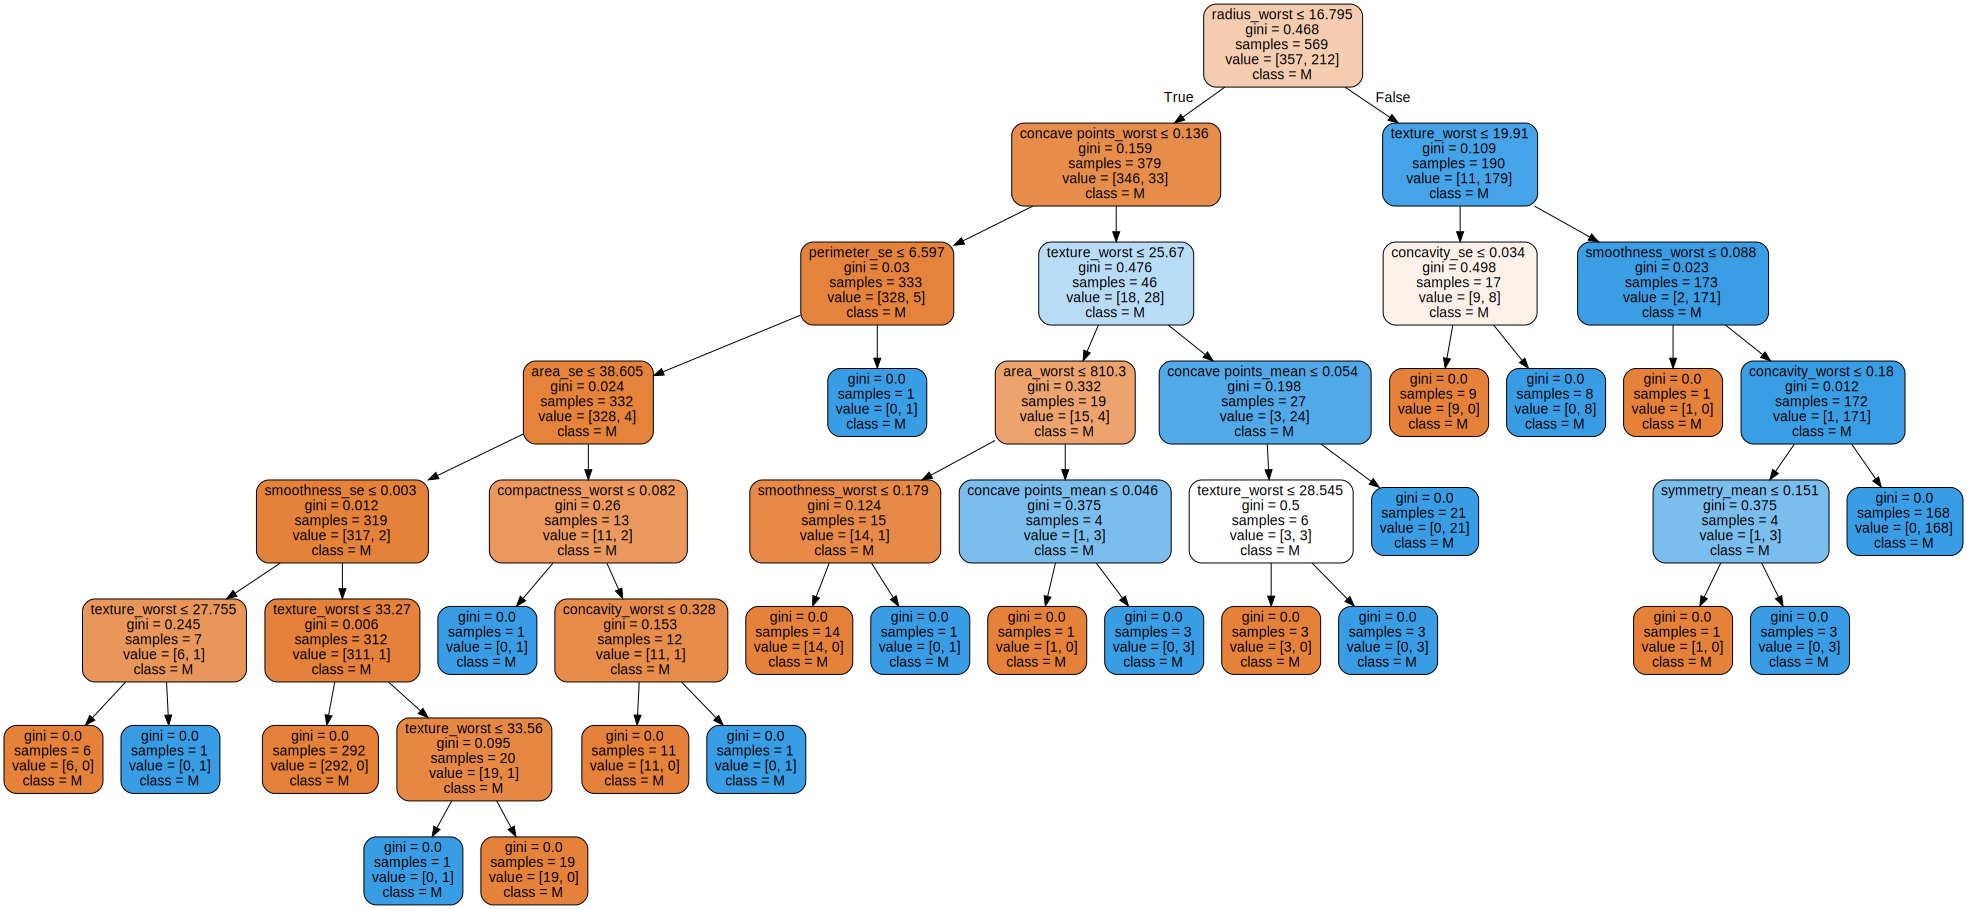

In [60]:
import graphviz 
#dot_data = tree.export_graphviz(model, out_file=None)
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=X.columns,
                                class_names=data['diagnosis'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data) 
#graph.render("breat_cancer") #use this to sava a pdf file of the tree
graph